#LSTM Implementation for Time-Series Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
file_path = "/superstoref.csv"  # Replace with the actual path to your dataset
data = pd.read_csv(file_path)

In [ ]:

# Convert 'Order Date' to datetime and set it as the index
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data.set_index('Order Date', inplace=True)

In [ ]:
# Use the 'Sales' column as the time-series data
time_series_data = data['Sales']


In [ ]:


# Normalize the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(time_series_data.values.reshape(-1, 1))

In [ ]:
# Prepare the data for LSTM
def prepare_lstm_data(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


In [ ]:

sequence_length = 30  # Adjust the look-back period
X, y = prepare_lstm_data(data_normalized, sequence_length)


In [ ]:

# Reshape data for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:




# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (7816, 30, 1)
Testing Data Shape: (1954, 30, 1)


In [ ]:


# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Single output for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:



# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 9.5308e-04 - mae: 0.0128 - val_loss: 8.7651e-04 - val_mae: 0.0109
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 8.2395e-04 - mae: 0.0120 - val_loss: 8.5464e-04 - val_mae: 0.0137
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - loss: 9.4861e-04 - mae: 0.0122 - val_loss: 8.5594e-04 - val_mae: 0.0121
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 7.3525e-04 - mae: 0.0115 - val_loss: 8.6029e-04 - val_mae: 0.0145
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - loss: 4.6804e-04 - mae: 0.0107 - val_loss: 8.5328e-04 - val_mae: 0.0133
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - loss: 7.4094e-04 - mae: 0.0116 - val_loss: 8.5387e-04 - val_mae: 0.0124
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 6.4655e-04 - mae: 0.0117 - val_loss: 8.5294e-04 - val_mae: 0.0132
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 8.4545e-04 - mae: 0.0117 - val_loss: 8.669

In [ ]:

# Predict on test data
y_pred = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


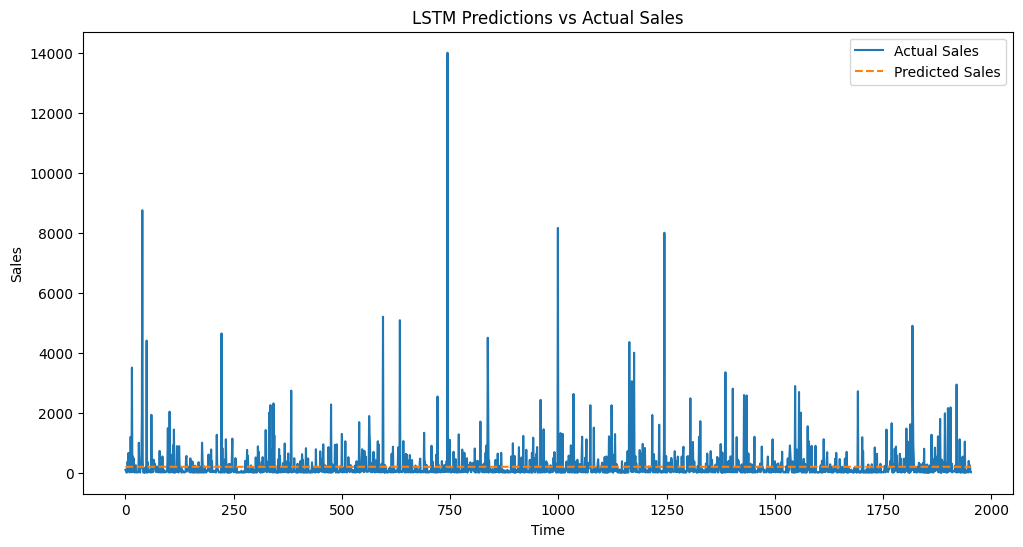

In [ ]:







# Inverse transform to get actual sales values
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual Sales")
plt.plot(y_pred_rescaled, label="Predicted Sales", linestyle="dashed")
plt.title("LSTM Predictions vs Actual Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()
